CLASSIFY AND PREDICT THE LOCATION OF THE USER TO RECEIVE A GOOD SIGNAL STRENGTH.
BUILDING 2 DIFFERENT MODEL AND COMPARING THEM
THE RSSI DATASET HAS 13 BEACON READINGS WHICH TELLS THE STRENGTH OF THE SIGNAL, RSSI READINGS ARE REPRESENTED IN NEGATIVE, 
IF IT IS –50 IT REPRESENTS THE USER IS CLOSE TO THE IBEACON AND HENCE THE STRENGTH OF SIGNAL IS MUCH STRONG THAN THE VALUE –95
WHICH REPRESENTS THE USER ISN'T IN THE CLOSE PROXIMITY OF THE BEACON AND HENCE THE STRENGTH OF THE SIGNAL IS WEAK. 
BLE RSSI LABELED DATASET IS USED TO TRAIN DIFFERENT CLASSIFIERS AND ANALYZE THE PERFORMANCE.

In [275]:
import pandas as pd
import numpy as np

In [276]:
data = pd.read_csv('iBeacon_RSSI_Labeled.csv')
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [277]:
data['location'].nunique()

105

In [278]:
data.shape

(1420, 15)

In [279]:
data.columns

Index(['location', 'date', 'b3001', 'b3002', 'b3003', 'b3004', 'b3005',
       'b3006', 'b3007', 'b3008', 'b3009', 'b3010', 'b3011', 'b3012', 'b3013'],
      dtype='object')

In [280]:
data.isnull().sum(),data.shape

(location    0
 date        0
 b3001       0
 b3002       0
 b3003       0
 b3004       0
 b3005       0
 b3006       0
 b3007       0
 b3008       0
 b3009       0
 b3010       0
 b3011       0
 b3012       0
 b3013       0
 dtype: int64,
 (1420, 15))

In [281]:
data.dtypes

location    object
date        object
b3001        int64
b3002        int64
b3003        int64
b3004        int64
b3005        int64
b3006        int64
b3007        int64
b3008        int64
b3009        int64
b3010        int64
b3011        int64
b3012        int64
b3013        int64
dtype: object

Data Visualzation of different classes 

<Axes: >

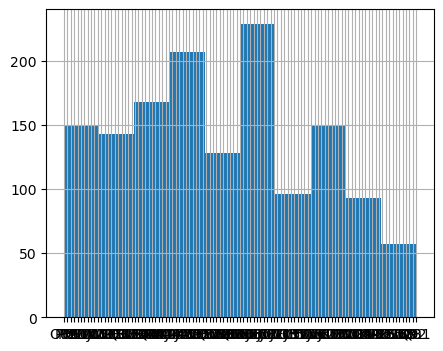

In [282]:
loc = data.iloc[:,0]
loc.hist(figsize=(5,4))

ENCODING OF DATASET

In [283]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['location'] = le.fit_transform(data['location'])
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,58,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,63,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,63,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,63,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,63,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [284]:
data.tail()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1415,6,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,6,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,6,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,6,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1419,6,4-19-2016 9:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [285]:
data.dtypes

location     int32
date        object
b3001        int64
b3002        int64
b3003        int64
b3004        int64
b3005        int64
b3006        int64
b3007        int64
b3008        int64
b3009        int64
b3010        int64
b3011        int64
b3012        int64
b3013        int64
dtype: object

In [286]:
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y %H:%M:%S')

In [287]:
X = data.drop(['location', 'date'],axis=1)
y = data.location

In [288]:
X

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [289]:
y

0       58
1       63
2       63
3       63
4       63
        ..
1415     6
1416     6
1417     6
1418     6
1419     6
Name: location, Length: 1420, dtype: int32

SPLITTING DATASET INTO TRAINING AND TESTING DATASETS

In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 50)

In [291]:
len(X_train)

1136

In [292]:
len(X_test)

284

MODEL TRAINING USING RANDOM FOREST CLASSIFIER

In [293]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [294]:
y_pred = rfc.predict(X_test)
y_pred

array([ 74,  78,  47,   2,  30,  83,  33,  38,  23,  29,  13,  14,  30,
         7,   7,  61,  11,  29,  17,   9,  83,  10,  53,  78,  47,  37,
         7,  79,  15,  81,  61,  12,   6,  78,  40,  72,  34,  68,  73,
         2,  72,  97,   8,  97,  40,  11,  36,  51,  80,  28,  23,  55,
        40,  82,  12,  29,  32,  70,  29,  22,  29,  10,   7,  43,  50,
        63,  56,  11,   6,  97,  47,  87,  37,  83,  96,  86, 101,  20,
        16, 101,  83,  50,  61,  60,  13,  93,  46,  20,  31,  61,  20,
        47,  44,  31,  13,  22, 103,  52,  13,  74,  83,  38,  29,  45,
         7,  59,   7,  62,  53,  13,   7,  61,  13,   8,  49,  18,  29,
        71,  12,  72,  13,  15,   7,  68,  49,  20,  83,  86,  69,  65,
         4,   7,  31,   6,  72,  18,   7,  63,   7,  15,  72,  86,  52,
        38,  61,  44,  52,  20,   0,  78,   8,  33,  87,  97,  39,   7,
        83,  44,  49, 101,  22,   6,  45,  22,   7,  61,  70,  46,  17,
        38,  19,  40, 102,  74,  31,   9,  74,  60,  72,  62,  5

In [295]:
from sklearn.metrics import r2_score, accuracy_score
acc1 = accuracy_score(y_pred,y_test)
print("Accuracy score of Random Forsst Classifier is : ",acc1)
r2_sc1 = r2_score(y_pred,y_test)
print("R2 score of Random Forsst Classifier is : ",r2_sc1)

Accuracy score of Random Forsst Classifier is :  0.30985915492957744
R2 score of Random Forsst Classifier is :  0.8032246623077832


In [296]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\si

'              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67         2\n           2       0.33      1.00      0.50         1\n           3       0.00      0.00      0.00         1\n           4       1.00      1.00      1.00         2\n           6       0.12      0.25      0.17         4\n           7       0.06      0.20      0.10         5\n           8       0.33      0.67      0.44         3\n           9       0.25      0.20      0.22         5\n          10       0.00      0.00      0.00         2\n          11       0.25      0.25      0.25         4\n          12       0.33      0.25      0.29         4\n          13       0.50      0.67      0.57         6\n          14       0.00      0.00      0.00         0\n          15       1.00      1.00      1.00         3\n          16       1.00      1.00      1.00         1\n          17       0.00      0.00      0.00         2\n          18       0.00      0.00      0.00         9\n       

Graph plot between y_pred and y_test

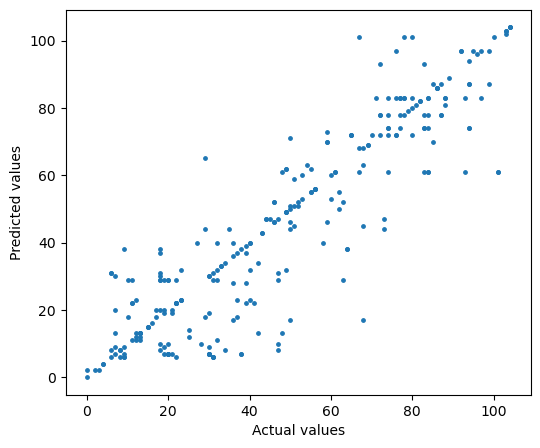

In [297]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=6)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


MODEL TRAINING USING DECISION TREE CLASSIFIER

In [298]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [299]:
y_pred2 = dt.predict(X_test)
y_pred2

array([ 74,  78,  29,   2,  30,  83,  32,  38,  23,   7,  13,  25,  18,
         7,   7,  61,  32,   7,  17,   9,  83,   6,  53,  78,  29,  37,
         7,  79,  15,  81,  61,  12,   6,  78,  40,  72,  34,  68,  73,
         2,  72,  97,   6,  97,  40,  11,  36,  59,  80,  28,  23,  55,
        40,  82,  12,  29,  49,  70,   9,  22,   7,   6,   7,  43,  50,
        63,  56,  13,   6,  97,  47,  87,  37,  83,  96,  86, 101,  20,
        16, 101,  83,  50,  61,  60,  13,  61,  46,  18,  31,  61,  20,
        29,  44,  31,  13,  22, 103,  52,  15,  74,  83,  20,  19,  45,
         7,  59,   7,  62,  53,  13,   7,  61,  13,   6,  49,  18,   7,
        45,  12,  72,  13,  15,   7,  62,  49,  20,  83,  86,  69,  65,
         4,   7,  31,   6,  72,  18,   7,  63,   7,  15,  65,  86,  45,
        38,  61,  44,  46,  20,   0,  78,   8,  33,  87,  97,  39,   7,
        83,  44,  49, 101,  22,   6,  45,  22,   7,  48,  70,  59,  17,
        38,  19,  40, 102,  74,  31,   9,  74,  53,  72,  62,  5

In [300]:
from sklearn.metrics import r2_score, accuracy_score
r2_sc2 = r2_score(y_pred2,y_test)
print("r2 score  of Decision Tree Classifier : ",r2_sc2)
acc_sc2 = accuracy_score(y_pred2,y_test)
print("Accuracy score of Decision Tree Classifier : ",acc_sc2)

r2 score  of Decision Tree Classifier :  0.7914347182790366
Accuracy score of Decision Tree Classifier :  0.31690140845070425


In [301]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred2)

C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\si

'              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67         2\n           2       0.33      1.00      0.50         1\n           3       0.00      0.00      0.00         1\n           4       1.00      1.00      1.00         2\n           6       0.14      0.50      0.22         4\n           7       0.05      0.20      0.08         5\n           8       0.00      0.00      0.00         3\n           9       0.14      0.20      0.17         5\n          10       0.00      0.00      0.00         2\n          11       0.33      0.25      0.29         4\n          12       0.17      0.25      0.20         4\n          13       0.33      0.50      0.40         6\n          15       0.75      1.00      0.86         3\n          16       1.00      1.00      1.00         1\n          17       0.00      0.00      0.00         2\n          18       0.00      0.00      0.00         9\n          19       0.25      0.20      0.22         5\n       

MODEL TRAINING USING SUPPORT VECTOR MACHINE

In [302]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [303]:
y_pred3 = svc.predict(X_test)
y_pred3


array([ 83,  83,  44,   2,  60,  83,  49,  30,  11,  20,  13,  12,  30,
        20,  20,  83,  11,  20,  62,  31,  83,  20,  30,  83,  44,  37,
        20,  73,  15,  88,  61,  22,  20,  83,  23,  83,  49,  61,  73,
         2,  83,  83,  20,  83,  62,  11,  62,  51,  88,  20,  23,  62,
        62,  82,  11,  20,  49,  73,  20,  22,  20,  20,  20,  43,  62,
        62,  56,  11,  20,  73,  44,  83,  60,  83, 104,  73,  83,  20,
        26,  83,  83,  60,  83,  60,  13,  83,  52,  20,  20,  83,  20,
        44,  44,  20,  23,  11, 104,  52,  13,  83,  83,  30,  30,  62,
        20,  51,  20,  62,  60,  11,  20,  83,  13,  20,  49,  20,  20,
        44,  11,  83,  23,  15,  20,  61,  49,  20,  83,  83,  82,  44,
         9,  20,  31,  20,  73,  20,  20,  62,  20,  15,  73,  73,  51,
        44,  83,  44,  52,  20,   2,  83,  23,  49,  83,  83,  73,  20,
        83,  44,  62,  83,  11,  20,  62,  22,  20,  61,  73,  52,  62,
        44,  20,  62, 104,  83,  20,  20,  73,  60,  83,  62,  5

In [304]:
from sklearn.metrics import r2_score, accuracy_score
r2_sc3 = r2_score(y_pred3,y_test)
print("R2 score of Support vector machine Classifier : ",r2_sc3)
acc_sc3 = accuracy_score(y_pred3,y_test)
print("Accuracy score of Support vector machine Classifier : ",acc_sc3)

R2 score of Support vector machine Classifier :  0.8307966649018438
Accuracy score of Support vector machine Classifier :  0.1936619718309859


In [305]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred3)

C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajnish Kumar\anaconda3\Lib\si

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           2       0.25      1.00      0.40         1\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         4\n           7       0.00      0.00      0.00         5\n           8       0.00      0.00      0.00         3\n           9       0.00      0.00      0.00         5\n          10       0.00      0.00      0.00         2\n          11       0.19      0.75      0.30         4\n          12       0.00      0.00      0.00         4\n          13       0.60      0.50      0.55         6\n          15       1.00      1.00      1.00         3\n          16       0.00      0.00      0.00         1\n          17       0.00      0.00      0.00         2\n          18       0.00      0.00      0.00         9\n          19       0.00      0.00      0.00         5\n       